In [1]:
import sys
import os
sys.path.append(os.path.abspath("Pytorch/"))
sys.path.append(os.path.abspath("models/"))

In [2]:
from FBSNNs import *
from BlackScholesBarenblatt100D import *

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 100  # number of trajectories (batch size)
N = 50  # number of time snapshots
D = 100 # number of dimensions

layers = [D + 1] + 4 * [256] + [1]

Xi = np.array([1.0, 0.5] * int(D / 2))[None, :]
T = 1.0

"Available architectures"
mode = "FC"  # FC and Naisnet are available
activation = "Sine"  # Sine, ReLU and Tanh are available
model = BlackScholesBarenblatt(Xi, T, M, N, D,1, layers, mode, activation)

n_iter = 2*10**4
lr = 1e-3

In [4]:
model.load_model("models/BlackScholesBarenblatt100DRaissi25k.pth")

In [5]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 0, Loss: 5.482e+05, Y0: 0.421, Time: 0.59, Learning Rate: 1.000e-03
It: 100, Loss: 1.182e+05, Y0: 44.824, Time: 11.28, Learning Rate: 1.000e-03
It: 200, Loss: 3.964e+04, Y0: 63.316, Time: 10.94, Learning Rate: 1.000e-03
It: 300, Loss: 1.889e+04, Y0: 74.788, Time: 11.01, Learning Rate: 1.000e-03
It: 400, Loss: 1.568e+04, Y0: 67.132, Time: 11.10, Learning Rate: 1.000e-03
It: 500, Loss: 5.916e+03, Y0: 76.494, Time: 11.01, Learning Rate: 1.000e-03
It: 600, Loss: 5.055e+03, Y0: 77.808, Time: 10.93, Learning Rate: 1.000e-03
It: 700, Loss: 6.975e+03, Y0: 68.827, Time: 11.19, Learning Rate: 1.000e-03
It: 800, Loss: 3.216e+03, Y0: 74.843, Time: 11.13, Learning Rate: 1.000e-03
It: 900, Loss: 3.890e+03, Y0: 77.311, Time: 11.12, Learning Rate: 1.000e-03
It: 1000, Loss: 3.584e+03, Y0: 72.669, Time: 11.09, Learning Rate: 1.000e-03
It: 1100, Loss: 3.809e+03, Y0: 79.458, Time: 11.07, Learning Rate: 1.000e-03
It: 1200, Loss: 2.930e+03, Y0: 70.725, Time: 9.77, Learning Rate: 1.000e-03
It: 130

In [14]:
n_iter = 5*10**3
lr = 1e-5

In [15]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 19900, Loss: 9.973e+01, Y0: 77.908, Time: 0.11, Learning Rate: 1.000e-05
It: 20000, Loss: 2.750e+01, Y0: 76.893, Time: 9.79, Learning Rate: 1.000e-05
It: 20100, Loss: 3.127e+01, Y0: 76.970, Time: 9.88, Learning Rate: 1.000e-05
It: 20200, Loss: 2.368e+01, Y0: 76.893, Time: 9.79, Learning Rate: 1.000e-05
It: 20300, Loss: 2.884e+01, Y0: 77.014, Time: 9.70, Learning Rate: 1.000e-05
It: 20400, Loss: 2.827e+01, Y0: 76.990, Time: 9.77, Learning Rate: 1.000e-05
It: 20500, Loss: 2.466e+01, Y0: 77.033, Time: 9.93, Learning Rate: 1.000e-05
It: 20600, Loss: 2.678e+01, Y0: 77.047, Time: 9.83, Learning Rate: 1.000e-05
It: 20700, Loss: 3.149e+01, Y0: 77.097, Time: 9.85, Learning Rate: 1.000e-05
It: 20800, Loss: 2.481e+01, Y0: 77.042, Time: 9.83, Learning Rate: 1.000e-05
It: 20900, Loss: 2.383e+01, Y0: 77.000, Time: 9.89, Learning Rate: 1.000e-05
It: 21000, Loss: 2.334e+01, Y0: 77.078, Time: 9.77, Learning Rate: 1.000e-05
It: 21100, Loss: 2.496e+01, Y0: 77.061, Time: 9.79, Learning Rate: 1.

In [5]:
graph = model.iteration, model.training_loss

In [6]:
np.random.seed(35)
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)
samples = 5

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

Y_test = np.reshape(u_exact(T,np.reshape(t_test[0:M, :, :], [-1, 1]), np.reshape(X_pred[0:M, :, :], [-1, D])),
                    [M, -1, 1])

In [7]:
def figsize(scale, nplots = 1):
    fig_width_pt = 438.17227                        
    inches_per_pt = 1.0/72.27                       
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            
    fig_width = fig_width_pt*inches_per_pt*scale    
    fig_height = nplots*fig_width*golden_mean             
    fig_size = [fig_width,fig_height]
    return fig_size

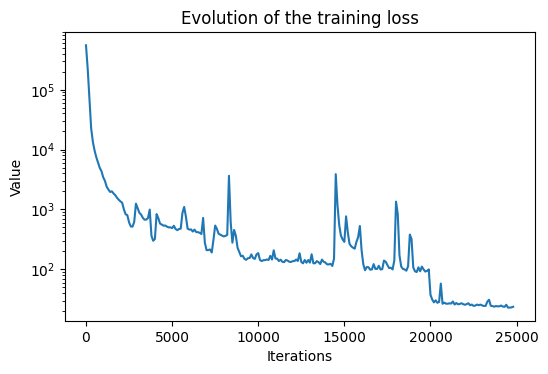

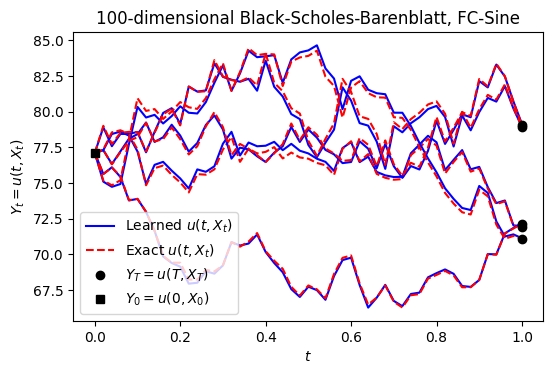

In [8]:
plt.figure(figsize=figsize(1))
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
plt.savefig('Figures/BlackScholesBarenblatt100DLossRaissi25k' + mode + "-" + activation + '.pdf')

plt.figure(figsize=figsize(1))
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T, 'b', label='Learned $u(t,X_t)$')
plt.plot(t_test[0:1, :, 0].T, Y_test[0:1, :, 0].T, 'r--', label='Exact $u(t,X_t)$')
plt.plot(t_test[0:1, -1, 0], Y_test[0:1, -1, 0], 'ko', label='$Y_T = u(T,X_T)$')

plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T, 'b')
plt.plot(t_test[1:samples, :, 0].T, Y_test[1:samples, :, 0].T, 'r--')
plt.plot(t_test[1:samples, -1, 0], Y_test[1:samples, -1, 0], 'ko')

plt.plot([0], Y_test[0, 0, 0], 'ks', label='$Y_0 = u(0,X_0)$')

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()
plt.savefig('Figures/BlackScholesBarenblatt100DPredsRaissi25k' + mode + "-" + activation + '.pdf')

plt.show()

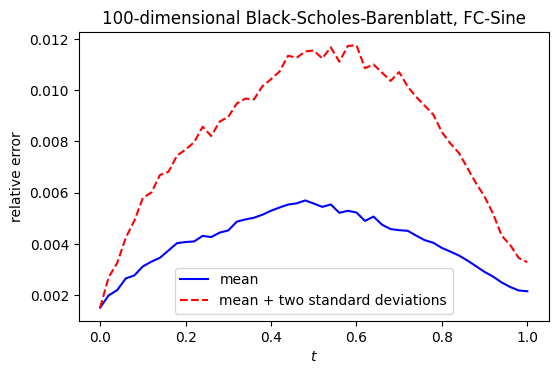

In [9]:
errors = np.sqrt((Y_test - Y_pred) ** 2 / Y_test ** 2) 
mean_errors = np.mean(errors, 0)
std_errors = np.std(errors, 0) 
plt.figure(figsize=figsize(1))
plt.plot(t_test[0, :, 0], mean_errors, 'b', label='mean')
plt.plot(t_test[0, :, 0], mean_errors + 2 * std_errors, 'r--', label='mean + two standard deviations')
plt.xlabel('$t$')
plt.ylabel('relative error')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()
plt.savefig('Figures/BlackScholesBarenblatt100DErrors' + mode + "-" + activation + 'Raissi25k.pdf')
plt.show()

In [10]:
model.save_model("models/BlackScholesBarenblatt100DRaissi25k.pth")